# ①支持向量机 LinearSVC

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model,cross_validation,svm

E:\Data_analysis_plan\python_36_install\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# 加载用于分类问题的数据集

In [2]:
def load_data_classfication():
    '''
    加载用于分类问题的数据集

    :return: 一个元组，用于分类问题。元组元素依次为：训练样本集、测试样本集、训练样本集对应的标记、测试样本集对应的标记
    '''
    iris=datasets.load_iris() # 使用 scikit-learn 自带的 iris 数据集
    X_train=iris.data
    y_train=iris.target
    return cross_validation.train_test_split(X_train, y_train,test_size=0.25,
		random_state=0,stratify=y_train) # 分层采样拆分成训练集和测试集，测试集大小为原始数据集大小的 1/4

# 测试 LinearSVC 的用法

In [3]:
def test_LinearSVC(*data):
    '''
    测试 LinearSVC 的用法

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的标记、测试样本的标记
    :return:  None
    '''
    X_train,X_test,y_train,y_test=data
    cls=svm.LinearSVC()
    cls.fit(X_train,y_train)
    print('Coefficients:%s, intercept %s'%(cls.coef_,cls.intercept_))
    print('Score: %.2f' % cls.score(X_test, y_test))

# 测试 LinearSVC 的预测性能随损失函数的影响

In [4]:
def test_LinearSVC_loss(*data):
    '''
    测试 LinearSVC 的预测性能随损失函数的影响

    :param data:  可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的标记、测试样本的标记
    :return:  None
    '''
    X_train,X_test,y_train,y_test=data
    losses=['hinge','squared_hinge']
    for loss in losses:
        cls=svm.LinearSVC(loss=loss)
        cls.fit(X_train,y_train)
        print("Loss:%s"%loss)
        print('Coefficients:%s, intercept %s'%(cls.coef_,cls.intercept_))
        print('Score: %.2f' % cls.score(X_test, y_test))

# 测试 LinearSVC 的预测性能随正则化形式的影响

In [5]:
def test_LinearSVC_L12(*data):
    '''
    测试 LinearSVC 的预测性能随正则化形式的影响

    :param data:  可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的标记、测试样本的标记
    :return:  None
    '''
    X_train,X_test,y_train,y_test=data
    L12=['l1','l2']
    for p in L12:
        cls=svm.LinearSVC(penalty=p,dual=False)
        cls.fit(X_train,y_train)
        print("penalty:%s"%p)
        print('Coefficients:%s, intercept %s'%(cls.coef_,cls.intercept_))
        print('Score: %.2f' % cls.score(X_test, y_test))

# 测试 LinearSVC 的预测性能随参数 C 的影响

In [6]:
def test_LinearSVC_C(*data):
    '''
    测试 LinearSVC 的预测性能随参数 C 的影响

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的标记、测试样本的标记
    :return:   None
    '''
    X_train,X_test,y_train,y_test=data
    Cs=np.logspace(-2,1)
    train_scores=[]
    test_scores=[]
    for C in Cs:
        cls=svm.LinearSVC(C=C)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test,y_test))

    ## 绘图
    fig=plt.figure(figsize=(10,8),dpi=80)
    ax=fig.add_subplot(1,1,1)
    ax.plot(Cs,train_scores,label="Traing score")
    ax.plot(Cs,test_scores,label="Testing score")
    ax.set_xlabel(r"C")
    ax.set_ylabel(r"score")
    ax.set_xscale('log')
    ax.set_title("LinearSVC")
    ax.legend(loc='best')
    plt.show()

# 生成用于分类的数据集

In [8]:
if __name__=="__main__":
    X_train,X_test,y_train,y_test=load_data_classfication() 

# 调用 test_LinearSVC

In [9]:
test_LinearSVC(X_train,X_test,y_train,y_test) 

Coefficients:[[ 0.20959561  0.39923895 -0.81738625 -0.44231791]
 [-0.12786522 -0.78202425  0.51876289 -1.02232581]
 [-0.80309077 -0.87632563  1.21384156  1.8101189 ]], intercept [ 0.11973778  2.03213934 -1.4443457 ]
Score: 0.97


# 调用 test_LinearSVC_loss

In [10]:
test_LinearSVC_loss(X_train,X_test,y_train,y_test) 

Loss:hinge
Coefficients:[[ 0.36636458  0.32165324 -1.07532975 -0.57004424]
 [ 0.47165124 -1.55681424  0.40208266 -1.35299323]
 [-1.21589863 -1.15588795  1.8559644   1.97211585]], intercept [ 0.18049887  1.33974644 -1.43610381]
Score: 0.97
Loss:squared_hinge
Coefficients:[[ 0.20959349  0.39923536 -0.81738853 -0.44231248]
 [-0.1293181  -0.78587263  0.52181535 -1.02434895]
 [-0.80316392 -0.87624488  1.21382687  1.8100164 ]], intercept [ 0.11973772  2.04308009 -1.44419848]
Score: 0.97


# 调用 test_LinearSVC_L12

In [11]:
test_LinearSVC_L12(X_train,X_test,y_train,y_test) 

penalty:l1
Coefficients:[[ 0.16786037  0.51659619 -0.93567821  0.        ]
 [-0.15288393 -0.90919431  0.48204425 -0.93294254]
 [-0.57665887 -0.85252309  0.97800698  2.30870815]], intercept [ 0.          2.58767104 -2.59278507]
Score: 0.97
penalty:l2
Coefficients:[[ 0.20966721  0.39922563 -0.81739423 -0.44237657]
 [-0.13079574 -0.7872181   0.52298032 -1.02445961]
 [-0.80308922 -0.87656106  1.21391169  1.81021937]], intercept [ 0.11945388  2.04805235 -1.44409296]
Score: 0.97


# 调用 test_LinearSVC_C

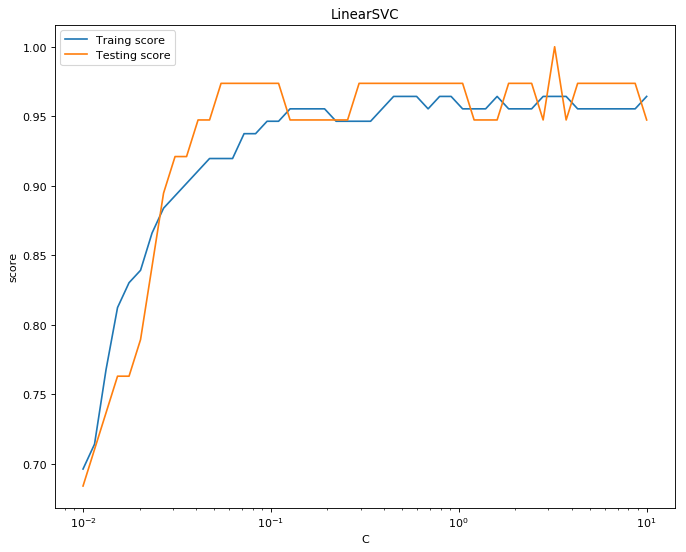

In [12]:
test_LinearSVC_C(X_train,X_test,y_train,y_test) 

# ② 支持向量机 LinearSVR

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model,cross_validation,svm

# 加载用于回归问题的数据集

In [14]:
def load_data_regression():
    '''
    加载用于回归问题的数据集

    :return: 一个元组，用于回归问题。元组元素依次为：训练样本集、测试样本集、训练样本集对应的值、测试样本集对应的值
    '''
    diabetes = datasets.load_diabetes() #使用 scikit-learn 自带的一个糖尿病病人的数据集
    return cross_validation.train_test_split(diabetes.data,diabetes.target,
		test_size=0.25,random_state=0)# 拆分成训练集和测试集，测试集大小为原始数据集大小的 1/4

# 测试 LinearSVR 的用法

In [15]:
def test_LinearSVR(*data):
    '''
    测试 LinearSVR 的用法

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的值、测试样本的值
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    regr=svm.LinearSVR()
    regr.fit(X_train,y_train)
    print('Coefficients:%s, intercept %s'%(regr.coef_,regr.intercept_))
    print('Score: %.2f' % regr.score(X_test, y_test))

# 测试 LinearSVR 的预测性能随不同损失函数的影响

In [16]:
def test_LinearSVR_loss(*data):
    '''
   测试 LinearSVR 的预测性能随不同损失函数的影响

    :param data:  可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的值、测试样本的值
    :return:
    '''
    X_train,X_test,y_train,y_test=data
    losses=['epsilon_insensitive','squared_epsilon_insensitive']
    for loss in losses:
        regr=svm.LinearSVR(loss=loss)
        regr.fit(X_train,y_train)
        print("loss：%s"%loss)
        print('Coefficients:%s, intercept %s'%(regr.coef_,regr.intercept_))
        print('Score: %.2f' % regr.score(X_test, y_test))

# 测试 LinearSVR 的预测性能随 epsilon 参数的影响

In [17]:
def test_LinearSVR_epsilon(*data):
    '''
    测试 LinearSVR 的预测性能随 epsilon 参数的影响

    :param data:  可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的值、测试样本的值
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    epsilons=np.logspace(-2,2)
    train_scores=[]
    test_scores=[]
    for  epsilon in  epsilons:
        regr=svm.LinearSVR(epsilon=epsilon,loss='squared_epsilon_insensitive')
        regr.fit(X_train,y_train)
        train_scores.append(regr.score(X_train, y_train))
        test_scores.append(regr.score(X_test, y_test))
    fig=plt.figure(figsize=(10,8),dpi=80)
    ax=fig.add_subplot(1,1,1)
    ax.plot(epsilons,train_scores,label="Training score ",marker='+' )
    ax.plot(epsilons,test_scores,label= " Testing  score ",marker='o' )
    ax.set_title( "LinearSVR_epsilon ")
    ax.set_xscale("log")
    ax.set_xlabel(r"$\epsilon$")
    ax.set_ylabel("score")
    ax.set_ylim(-1,1.05)
    ax.legend(loc="best",framealpha=0.5)
    plt.show()

# 测试 LinearSVR 的预测性能随 C 参数的影响

In [24]:
def test_LinearSVR_C(*data):
    '''
    测试 LinearSVR 的预测性能随 C 参数的影响

    :param data:  可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的值、测试样本的值
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    Cs=np.logspace(-1,2)
    train_scores=[]
    test_scores=[]
    for  C in  Cs:
        regr=svm.LinearSVR(epsilon=0.1,loss='squared_epsilon_insensitive',C=C)
        regr.fit(X_train,y_train)
        train_scores.append(regr.score(X_train, y_train))
        test_scores.append(regr.score(X_test, y_test))
    fig=plt.figure(figsize=(10,8),dpi=80)
    ax=fig.add_subplot(1,1,1)
    ax.plot(Cs,train_scores,label="Training score ",marker='+' )
    ax.plot(Cs,test_scores,label= " Testing  score ",marker='o' )
    ax.set_title( "LinearSVR_C ")
    ax.set_xscale("log")
    ax.set_xlabel(r"C")
    ax.set_ylabel("score")
    ax.set_ylim(-1,1.05)
    ax.legend(loc="best",framealpha=0.5)
    plt.show()

# 生成用于回归问题的数据集

In [25]:
if __name__=="__main__":
    X_train,X_test,y_train,y_test=load_data_regression() 

# 调用 test_LinearSVR

In [26]:
test_LinearSVR(X_train,X_test,y_train,y_test) 

Coefficients:[ 2.14940259  0.4418875   6.35258779  4.62357282  2.82085901  2.42005063
 -5.3367464   5.41765142  7.26812843  4.33778867], intercept [ 99.]
Score: -0.56


# 调用 test_LinearSVR_loss

In [27]:
test_LinearSVR_loss(X_train,X_test,y_train,y_test) 

loss：epsilon_insensitive
Coefficients:[ 2.14940259  0.4418875   6.35258779  4.62357282  2.82085901  2.42005063
 -5.3367464   5.41765142  7.26812843  4.33778867], intercept [ 99.]
Score: -0.56
loss：squared_epsilon_insensitive
Coefficients:[   7.05200165 -103.32922123  395.67466752  221.76473434  -11.07983108
  -63.55593425 -176.67699973  117.56341319  322.63646889   95.61522526], intercept [ 152.37552398]
Score: 0.38


# 调用 test_LinearSVR_epsilon

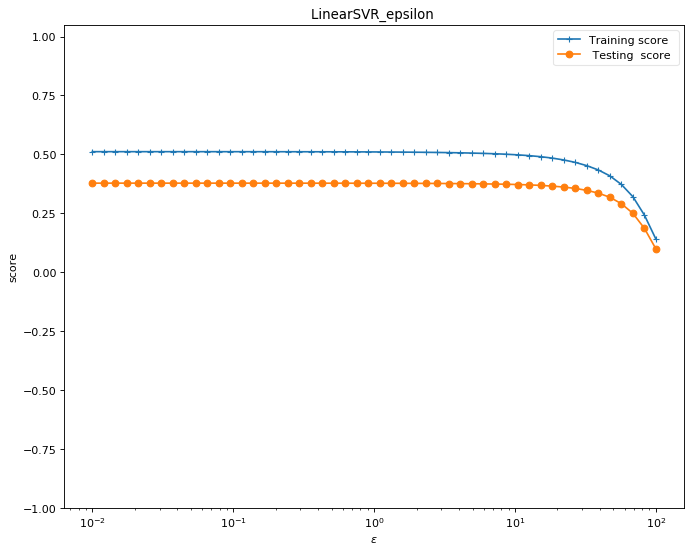

In [28]:
test_LinearSVR_epsilon(X_train,X_test,y_train,y_test) 

# 调用 test_LinearSVR_C

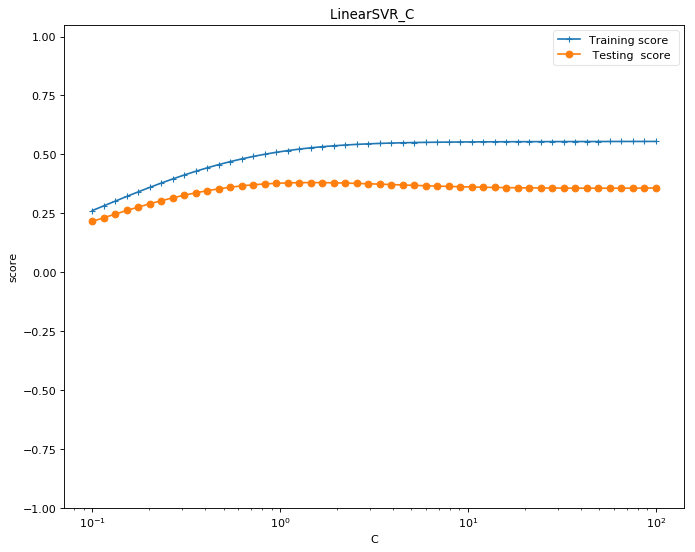

In [29]:
test_LinearSVR_C(X_train,X_test,y_train,y_test) 

# ③ 支持向量机 SVC

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model,cross_validation,svm

# 加载用于分类问题的数据集

In [31]:
def load_data_classfication():
    '''
    加载用于分类问题的数据集

    :return: 一个元组，用于分类问题。元组元素依次为：训练样本集、测试样本集、训练样本集对应的标记、测试样本集对应的标记
    '''
    iris=datasets.load_iris()# 使用 scikit-learn 自带的 iris 数据集
    X_train=iris.data
    y_train=iris.target
    return cross_validation.train_test_split(X_train, y_train,test_size=0.25,
		random_state=0,stratify=y_train) # 分层采样拆分成训练集和测试集，测试集大小为原始数据集大小的 1/4

# 测试 SVC 的用法。这里使用的是最简单的线性核

In [32]:
def test_SVC_linear(*data):
    '''
    测试 SVC 的用法。这里使用的是最简单的线性核

    :param data:  可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的标记、测试样本的标记
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    cls=svm.SVC(kernel='linear')
    cls.fit(X_train,y_train)
    print('Coefficients:%s, intercept %s'%(cls.coef_,cls.intercept_))
    print('Score: %.2f' % cls.score(X_test, y_test))

# 测试多项式核的 SVC 的预测性能随 degree、gamma、coef0 的影响

In [33]:
def test_SVC_poly(*data):
    '''
    测试多项式核的 SVC 的预测性能随 degree、gamma、coef0 的影响.

    :param data:  可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的标记、测试样本的标记
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    fig=plt.figure(figsize=(10,8),dpi=80)
    ### 测试 degree ####
    degrees=range(1,20)
    train_scores=[]
    test_scores=[]
    for degree in degrees:
        cls=svm.SVC(kernel='poly',degree=degree)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test, y_test))
    ax=fig.add_subplot(1,3,1) # 一行三列
    ax.plot(degrees,train_scores,label="Training score ",marker='+' )
    ax.plot(degrees,test_scores,label= " Testing  score ",marker='o' )
    ax.set_title( "SVC_poly_degree ")
    ax.set_xlabel("p")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.05)
    ax.legend(loc="best",framealpha=0.5)

    ### 测试 gamma ，此时 degree 固定为 3####
    gammas=range(1,20)
    train_scores=[]
    test_scores=[]
    for gamma in gammas:
        cls=svm.SVC(kernel='poly',gamma=gamma,degree=3)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test, y_test))
    ax=fig.add_subplot(1,3,2)
    ax.plot(gammas,train_scores,label="Training score ",marker='+' )
    ax.plot(gammas,test_scores,label= " Testing  score ",marker='o' )
    ax.set_title( "SVC_poly_gamma ")
    ax.set_xlabel(r"$\gamma$")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.05)
    ax.legend(loc="best",framealpha=0.5)
    ### 测试 r ，此时 gamma固定为10 ， degree 固定为 3######
    rs=range(0,20)
    train_scores=[]
    test_scores=[]
    for r in rs:
        cls=svm.SVC(kernel='poly',gamma=10,degree=3,coef0=r)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test, y_test))
    ax=fig.add_subplot(1,3,3)
    ax.plot(rs,train_scores,label="Training score ",marker='+' )
    ax.plot(rs,test_scores,label= " Testing  score ",marker='o' )
    ax.set_title( "SVC_poly_r ")
    ax.set_xlabel(r"r")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.05)
    ax.legend(loc="best",framealpha=0.5)
    plt.show()

# 测试 高斯核的 SVC 的预测性能随 gamma 参数的影响

In [34]:
def test_SVC_rbf(*data):
    '''
    测试 高斯核的 SVC 的预测性能随 gamma 参数的影响

    :param data:  可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的标记、测试样本的标记
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    gammas=range(1,20)
    train_scores=[]
    test_scores=[]
    for gamma in gammas:
        cls=svm.SVC(kernel='rbf',gamma=gamma)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test, y_test))
    fig=plt.figure(figsize=(10,8),dpi=80)
    ax=fig.add_subplot(1,1,1)
    ax.plot(gammas,train_scores,label="Training score ",marker='+' )
    ax.plot(gammas,test_scores,label= " Testing  score ",marker='o' )
    ax.set_title( "SVC_rbf")
    ax.set_xlabel(r"$\gamma$")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.05)
    ax.legend(loc="best",framealpha=0.5)
    plt.show()

# 测试 sigmoid 核的 SVC 的预测性能随 gamma、coef0 的影响

In [35]:
def test_SVC_sigmoid(*data):
    '''
    测试 sigmoid 核的 SVC 的预测性能随 gamma、coef0 的影响.

    :param data:  可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的标记、测试样本的标记
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    fig=plt.figure(figsize=(10,8),dpi=80)

    ### 测试 gamma ，固定 coef0 为 0 ####
    gammas=np.logspace(-2,1)
    train_scores=[]
    test_scores=[]

    for gamma in gammas:
        cls=svm.SVC(kernel='sigmoid',gamma=gamma,coef0=0)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test, y_test))
    ax=fig.add_subplot(1,2,1)
    ax.plot(gammas,train_scores,label="Training score ",marker='+' )
    ax.plot(gammas,test_scores,label= " Testing  score ",marker='o' )
    ax.set_title( "SVC_sigmoid_gamma ")
    ax.set_xscale("log")
    ax.set_xlabel(r"$\gamma$")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.05)
    ax.legend(loc="best",framealpha=0.5)
    ### 测试 r，固定 gamma 为 0.01 ######
    rs=np.linspace(0,5)
    train_scores=[]
    test_scores=[]

    for r in rs:
        cls=svm.SVC(kernel='sigmoid',coef0=r,gamma=0.01)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test, y_test))
    ax=fig.add_subplot(1,2,2)
    ax.plot(rs,train_scores,label="Training score ",marker='+' )
    ax.plot(rs,test_scores,label= " Testing  score ",marker='o' )
    ax.set_title( "SVC_sigmoid_r ")
    ax.set_xlabel(r"r")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.05)
    ax.legend(loc="best",framealpha=0.5)
    plt.show()

# 生成用于分类问题的数据集

In [38]:
if __name__=="__main__":
    X_train,X_test,y_train,y_test=load_data_classfication() 

# 调用 test_SVC_linear

In [39]:
test_SVC_linear(X_train,X_test,y_train,y_test) 

Coefficients:[[-0.16990304  0.47442881 -0.93075307 -0.51249447]
 [ 0.02439178  0.21890135 -0.52833486 -0.25913786]
 [ 0.52289771  0.95783924 -1.82516872 -2.00292778]], intercept [ 2.0368826  1.1512924  6.3276538]
Score: 1.00


# 调用 test_SVC_poly

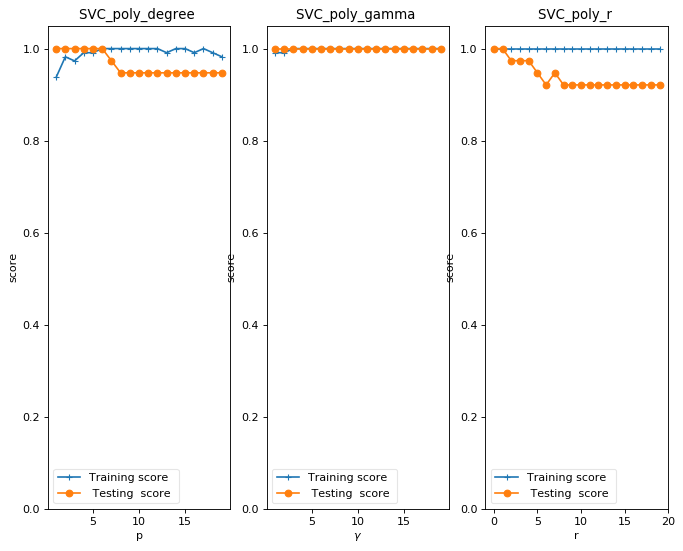

In [42]:
test_SVC_poly(X_train,X_test,y_train,y_test) 

# 调用 test_SVC_rbf

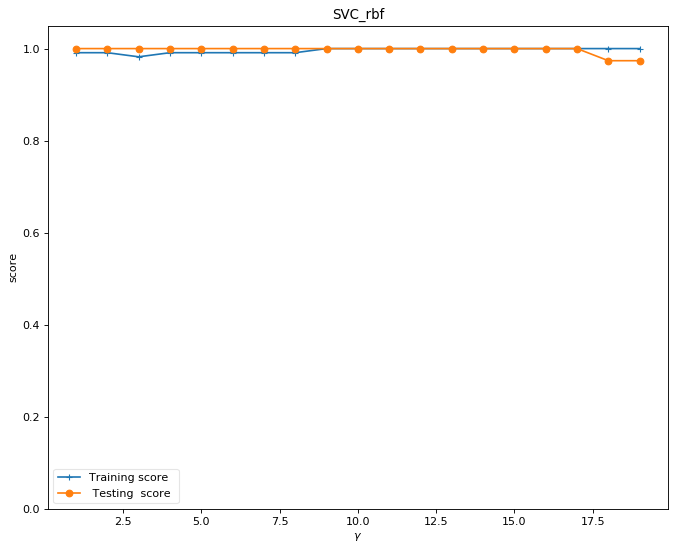

In [43]:
test_SVC_rbf(X_train,X_test,y_train,y_test) 

# test_SVC_sigmoid test_SVC_linear

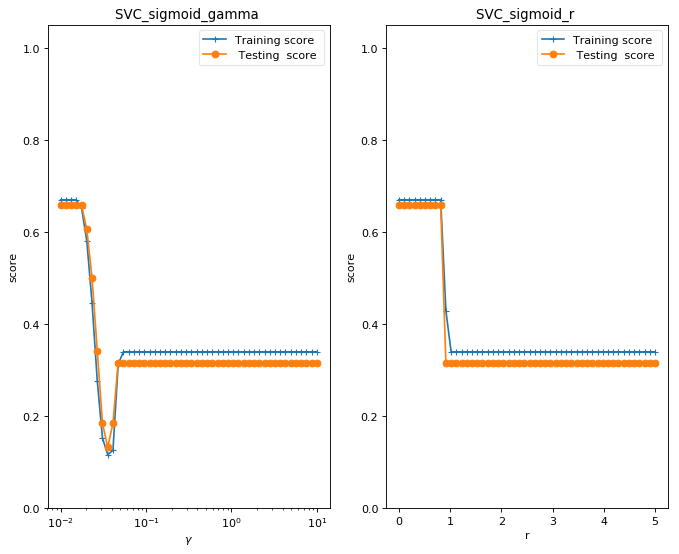

In [44]:
test_SVC_sigmoid(X_train,X_test,y_train,y_test) 

# ④ 支持向量机 SVR

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model,cross_validation,svm

# 加载用于回归问题的数据集

In [46]:
def load_data_regression():
    '''
    加载用于回归问题的数据集

    :return: 一个元组，用于回归问题。元组元素依次为：训练样本集、测试样本集、训练样本集对应的值、测试样本集对应的值
    '''
    diabetes = datasets.load_diabetes()
    return cross_validation.train_test_split(diabetes.data,diabetes.target,
		test_size=0.25,random_state=0)

# 测试 SVR 的用法。这里使用最简单的线性核

In [47]:
def test_SVR_linear(*data):
    '''
    测试 SVR 的用法。这里使用最简单的线性核

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的值、测试样本的值
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    regr=svm.SVR(kernel='linear')
    regr.fit(X_train,y_train)
    print('Coefficients:%s, intercept %s'%(regr.coef_,regr.intercept_))
    print('Score: %.2f' % regr.score(X_test, y_test))

# 测试 多项式核的 SVR 的预测性能随  degree、gamma、coef0 的影响

In [48]:
def test_SVR_poly(*data):
    '''
    测试 多项式核的 SVR 的预测性能随  degree、gamma、coef0 的影响.

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的值、测试样本的值
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    fig=plt.figure(figsize=(10,8),dpi=80)
    ### 测试 degree ####
    degrees=range(1,20)
    train_scores=[]
    test_scores=[]
    for degree in degrees:
        regr=svm.SVR(kernel='poly',degree=degree,coef0=1)
        regr.fit(X_train,y_train)
        train_scores.append(regr.score(X_train,y_train))
        test_scores.append(regr.score(X_test, y_test))
    ax=fig.add_subplot(1,3,1)
    ax.plot(degrees,train_scores,label="Training score ",marker='+' )
    ax.plot(degrees,test_scores,label= " Testing  score ",marker='o' )
    ax.set_title( "SVR_poly_degree r=1")
    ax.set_xlabel("p")
    ax.set_ylabel("score")
    ax.set_ylim(-1,1.)
    ax.legend(loc="best",framealpha=0.5)

    ### 测试 gamma，固定 degree为3， coef0 为 1 ####
    gammas=range(1,40)
    train_scores=[]
    test_scores=[]
    for gamma in gammas:
        regr=svm.SVR(kernel='poly',gamma=gamma,degree=3,coef0=1)
        regr.fit(X_train,y_train)
        train_scores.append(regr.score(X_train,y_train))
        test_scores.append(regr.score(X_test, y_test))
    ax=fig.add_subplot(1,3,2)
    ax.plot(gammas,train_scores,label="Training score ",marker='+' )
    ax.plot(gammas,test_scores,label= " Testing  score ",marker='o' )
    ax.set_title( "SVR_poly_gamma  r=1")
    ax.set_xlabel(r"$\gamma$")
    ax.set_ylabel("score")
    ax.set_ylim(-1,1)
    ax.legend(loc="best",framealpha=0.5)
    ### 测试 r，固定 gamma 为 20，degree为 3 ######
    rs=range(0,20)
    train_scores=[]
    test_scores=[]
    for r in rs:
        regr=svm.SVR(kernel='poly',gamma=20,degree=3,coef0=r)
        regr.fit(X_train,y_train)
        train_scores.append(regr.score(X_train,y_train))
        test_scores.append(regr.score(X_test, y_test))
    ax=fig.add_subplot(1,3,3)
    ax.plot(rs,train_scores,label="Training score ",marker='+' )
    ax.plot(rs,test_scores,label= " Testing  score ",marker='o' )
    ax.set_title( "SVR_poly_r gamma=20 degree=3")
    ax.set_xlabel(r"r")
    ax.set_ylabel("score")
    ax.set_ylim(-1,1.)
    ax.legend(loc="best",framealpha=0.5)
    plt.show()

# 测试 高斯核的 SVR 的预测性能随 gamma 参数的影响

In [49]:
def test_SVR_rbf(*data):
    '''
    测试 高斯核的 SVR 的预测性能随 gamma 参数的影响

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的值、测试样本的值
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    gammas=range(1,20)
    train_scores=[]
    test_scores=[]
    for gamma in gammas:
        regr=svm.SVR(kernel='rbf',gamma=gamma)
        regr.fit(X_train,y_train)
        train_scores.append(regr.score(X_train,y_train))
        test_scores.append(regr.score(X_test, y_test))
    fig=plt.figure(figsize=(10,8),dpi=80)
    ax=fig.add_subplot(1,1,1)
    ax.plot(gammas,train_scores,label="Training score ",marker='+' )
    ax.plot(gammas,test_scores,label= " Testing  score ",marker='o' )
    ax.set_title( "SVR_rbf")
    ax.set_xlabel(r"$\gamma$")
    ax.set_ylabel("score")
    ax.set_ylim(-1,1)
    ax.legend(loc="best",framealpha=0.5)
    plt.show()

# 测试 sigmoid 核的 SVR 的预测性能随 gamma、coef0 的影响

In [50]:
def test_SVR_sigmoid(*data):
    '''
    测试 sigmoid 核的 SVR 的预测性能随 gamma、coef0 的影响.

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的值、测试样本的值
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    fig=plt.figure(figsize=(10,8),dpi=80)

    ### 测试 gammam，固定 coef0 为 0.01 ####
    gammas=np.logspace(-1,3)
    train_scores=[]
    test_scores=[]

    for gamma in gammas:
        regr=svm.SVR(kernel='sigmoid',gamma=gamma,coef0=0.01)
        regr.fit(X_train,y_train)
        train_scores.append(regr.score(X_train,y_train))
        test_scores.append(regr.score(X_test, y_test))
    ax=fig.add_subplot(1,2,1)
    ax.plot(gammas,train_scores,label="Training score ",marker='+' )
    ax.plot(gammas,test_scores,label= " Testing  score ",marker='o' )
    ax.set_title( "SVR_sigmoid_gamma r=0.01")
    ax.set_xscale("log")
    ax.set_xlabel(r"$\gamma$")
    ax.set_ylabel("score")
    ax.set_ylim(-1,1)
    ax.legend(loc="best",framealpha=0.5)
    ### 测试 r ，固定 gamma 为 10 ######
    rs=np.linspace(0,5)
    train_scores=[]
    test_scores=[]

    for r in rs:
        regr=svm.SVR(kernel='sigmoid',coef0=r,gamma=10)
        regr.fit(X_train,y_train)
        train_scores.append(regr.score(X_train,y_train))
        test_scores.append(regr.score(X_test, y_test))
    ax=fig.add_subplot(1,2,2)
    ax.plot(rs,train_scores,label="Training score ",marker='+' )
    ax.plot(rs,test_scores,label= " Testing  score ",marker='o' )
    ax.set_title( "SVR_sigmoid_r gamma=10")
    ax.set_xlabel(r"r")
    ax.set_ylabel("score")
    ax.set_ylim(-1,1)
    ax.legend(loc="best",framealpha=0.5)
    plt.show()

# 生成用于回归问题的数据集

In [52]:
if __name__=="__main__":
    X_train,X_test,y_train,y_test=load_data_regression() 

# 调用 test_SVR_linear

In [53]:
test_SVR_linear(X_train,X_test,y_train,y_test) 

Coefficients:[[ 2.24127622 -0.38128702  7.87018376  5.21135861  2.26619436  1.70869458
  -5.7746489   5.51487251  7.94860817  4.59359657]], intercept [ 137.11012796]
Score: -0.03


# 调用 test_SVR_poly 

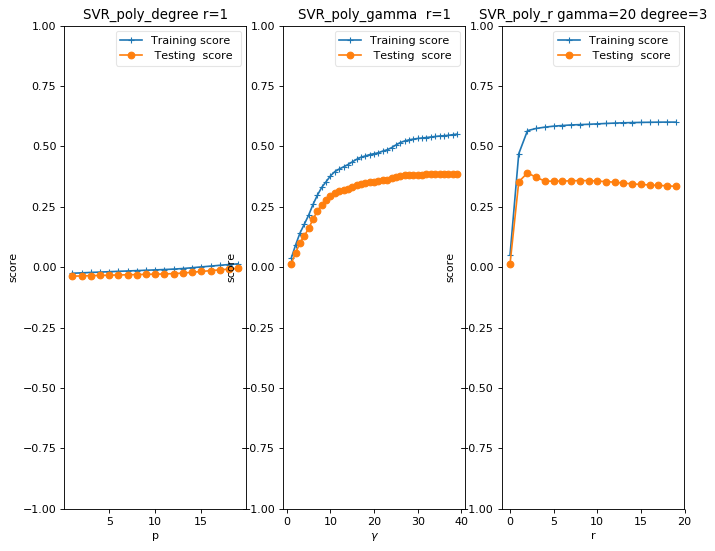

In [54]:
test_SVR_poly(X_train,X_test,y_train,y_test) 

# 调用 test_SVR_rbf

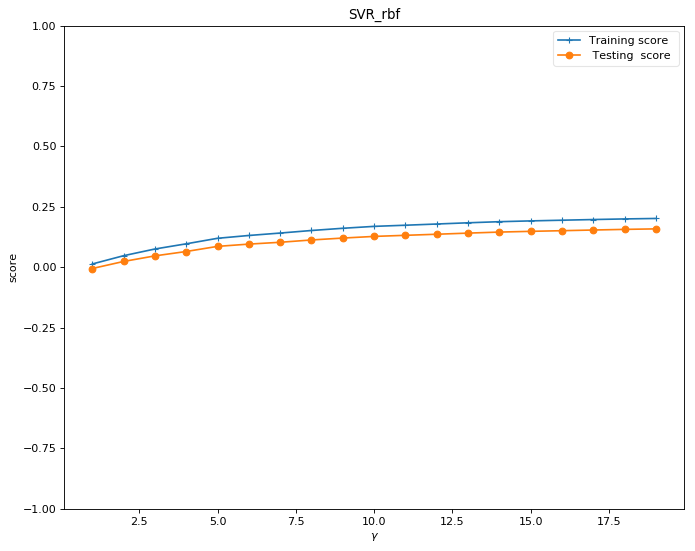

In [56]:
test_SVR_rbf(X_train,X_test,y_train,y_test) 

# 调用 test_SVR_sigmod

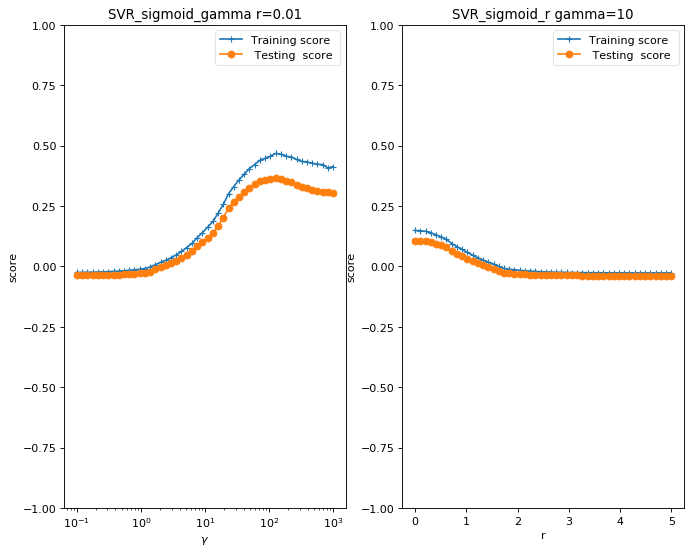

In [57]:
test_SVR_sigmoid(X_train,X_test,y_train,y_test) 